## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Stakeholder: Real Estate Investment Firm interested in buying houses, improving them, and selling them.
Target: price

# EDA

## Imports

In [161]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import statsmodels.api as sm

## Functions

In [162]:
def x_and_OHE_model(df, x_df, y2, ohe_cols):

    return scaled_oheall_model

In [163]:
def drop_outliers(df, col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1

    lower_lim = q1 - 1.5 * iqr
    upper_lim = q3 + 1.5 * iqr

    df = df.loc[ (df[col] >= lower_lim) & (df[col] <= upper_lim) ].reset_index(drop=True)
    return df

In [164]:
def scale_numberical_cols(df, cols_to_scale):
    df = df.copy()
    features = cols_to_scale
    autoscaler = StandardScaler()
    df[features] = autoscaler.fit_transform(df[features])
    return df


## EDA

In [165]:
df = pd.read_csv('data/kc_house_data.csv')
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [166]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [167]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


Finding & Dropping Nulls

In [168]:
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [169]:
df = df.dropna().reset_index(drop=True)

In [170]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

Dropping Undesired Columns

In [171]:
df = df.drop(['date', 
              'view', 
              'sqft_above',
              'sqft_basement', 
              'yr_renovated', 
              'address', 
              'lat', 
              'long',
              'id'
             ], axis=1)

In [172]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built
count,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000
mean,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,330.475308,217.451264,1975.162299
std,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,285.725020,245.301991,32.052930
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,0.000000,0.000000,1900.000000
25%,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,0.000000,40.000000,1953.000000
50%,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,400.000000,150.000000,1977.000000
75%,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,510.000000,320.000000,2003.000000
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,3580.000000,4370.000000,2022.000000


Find the most correlated column to price

In [173]:
df.corr()['price'].sort_values()

sqft_lot       0.086550
yr_built       0.095796
floors         0.180589
sqft_garage    0.263674
bedrooms       0.288954
sqft_patio     0.313789
bathrooms      0.480337
sqft_living    0.608616
price          1.000000
Name: price, dtype: float64

### EDA Visualizations

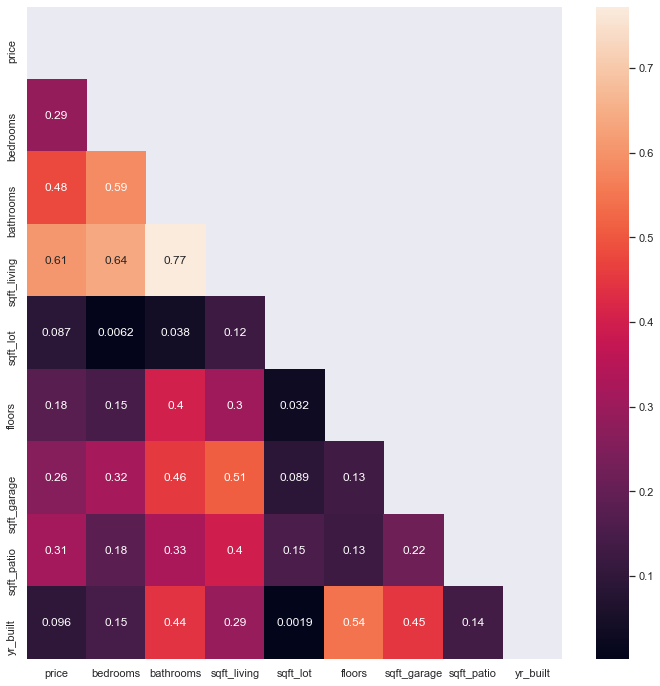

In [174]:
sns.set(rc={'figure.figsize':(12, 12)})

# Use the .heatmap function to depict the relationships visually!
mask  = np.triu(np.ones_like(df.corr()))
sns.heatmap(abs(df.corr()), annot=True, mask=mask);

In [175]:
#pairplot with continuous variables
#commented out for run-time

#sns.pairplot(df[['price', 'sqft_living', 'sqft_lot', 'sqft_patio']])

In [176]:
#pairplot with wanted columns
#commented out for run-time

#sns.pairplot(df_colwanted)

Log Scale Target

<AxesSubplot:xlabel='price', ylabel='Count'>

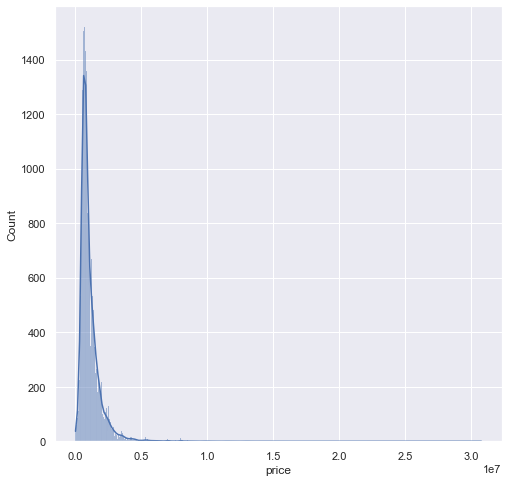

In [177]:
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(df.price, kde=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

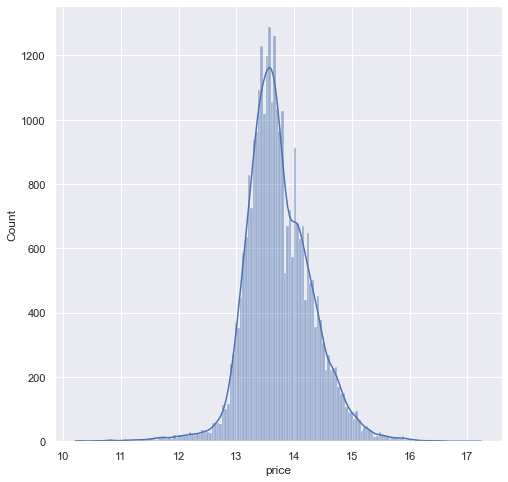

In [178]:
#logscaling target
fig, ax = plt.subplots(figsize=(8,8))
y2 = np.log(df.price)
sns.histplot(y2, kde=True)

### EDA - Baseline OLS Model

In [179]:
x = sm.add_constant(df[['sqft_living', 'sqft_lot', 'sqft_patio']])
y = df['price']
model = sm.OLS(y, x).fit()
model.rsquared

0.3766514441665971

In [180]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     6064.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:02:29   Log-Likelihood:            -4.4832e+05
No. Observations:               30111   AIC:                         8.966e+05
Df Residuals:                   30107   BIC:                         8.967e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.759e+04   9751.208     -7.956      0.000   -9.67e+04   -5.85e+04
sqft_living   528.9107      4.575    115.605      0.000     519.943     537.878
sqft_lot        0.0464      0.069      0.672      0.502      -0.089       0.182
sqft_patio    312.7786     18.239     17.149      0.000     277.029     348.528
==============================================================================
Omnibus:                    43140.750   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         45972551.037
Skew:                           8.106   Prob(JB):                         0.00
Kurtosis:                     193.734   Cond. No.                     1.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### EDA - Log Scaled OLS Model

In [181]:
x = sm.add_constant(df[['sqft_living', 'sqft_lot', 'sqft_patio']])
y2 = np.log(df['price'])
model = sm.OLS(y2, x).fit()
model.rsquared

0.3916904360853065

In [182]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     6462.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:02:29   Log-Likelihood:                -18944.
No. Observations:               30111   AIC:                         3.790e+04
Df Residuals:                   30107   BIC:                         3.793e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9485      0.006   2070.495      0.000      12.936      12.961
sqft_living     0.0004   2.93e-06    120.629      0.000       0.000       0.000
sqft_lot     6.312e-09   4.43e-08      0.143      0.887   -8.05e-08    9.31e-08
sqft_patio      0.0002   1.17e-05     15.311      0.000       0.000       0.000
==============================================================================
Omnibus:                     5961.142   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50165.584
Skew:                          -0.718   Prob(JB):                         0.00
Kurtosis:                       9.158   Cond. No.                     1.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### EDA - Log Scaled OLS

(dropping columns to address multicolinearity)

In [183]:
x = sm.add_constant(df[['sqft_living']])
y2 = np.log(df['price'])
model = sm.OLS(y2, x).fit()
model.rsquared

0.38687772936956644

In [184]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                 1.900e+04
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:02:29   Log-Likelihood:                -19063.
No. Observations:               30111   AIC:                         3.813e+04
Df Residuals:                   30109   BIC:                         3.815e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9496      0.006   2062.757      0.000      12.937      12.962
sqft_living     0.0004    2.7e-06    137.836      0.000       0.000       0.000
==============================================================================
Omnibus:                     5867.888   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49915.366
Skew:                          -0.700   Prob(JB):                         0.00
Kurtosis:                       9.150   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### EDA - OneHotEncoding

In [185]:
#0:number of baths
#1:number of bedrooms
#2:condition
#3:heat source

ohe = OneHotEncoder(drop='first')
ohe_cols = ['bathrooms', 'bedrooms', 'condition', 'heat_source']
ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                        columns=ohe.get_feature_names())
ohe_all
X_cat = pd.concat([x,ohe_all], axis=1)
X_cat.head(2)

,const,sqft_living,x0_0.5,x0_1.0,x0_1.5,x0_2.0,x0_2.5,x0_3.0,x0_3.5,x0_4.0,...,x2_Fair,x2_Good,x2_Poor,x2_Very Good,x3_Electricity/Solar,x3_Gas,x3_Gas/Solar,x3_Oil,x3_Oil/Solar,x3_Other
0,1.0,1180,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,2770,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [186]:
scaled_oheall_model = sm.OLS(y2, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     480.5
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:02:29   Log-Likelihood:                -18554.
No. Observations:               30111   AIC:                         3.720e+04
Df Residuals:                   30067   BIC:                         3.756e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.9466      0.092    141.468      0.000      12.767      13.126
sqft_living              0.0004   4.76e-06     75.558      0.000       0.000       0.000
x0_0.5                   0.7767      0.235      3.312      0.001       0.317       1.236
x0_1.0                   0.5653      0.121      4.658      0.000       0.327       0.803
x0_1.5                   0.5939      0.122      4.876      0.000       0.355       0.833
x0_2.0                   0.6738      0.121      5.546      0.000       0.436       0.912
x0_2.5                   0.6758      0.121      5.564      0.000       0.438       0.914
x0_3.0                   0.7228      0.122      5.944      0.000       0.484       0.961
x0_3.5                   0.8300      0.122      6.814      0.000       0.591       1.069
x0_4.0                   0.8305      0.123      6.767      0.000       0.590       1.071
x0_4.5                   0.9078      0.123      7.363      0.000       0.666       1.149
x0_5.0                   0.8654      0.128      6.785      0.000       0.615       1.115
x0_5.5                   0.7907      0.130      6.080      0.000       0.536       1.046
x0_6.0                   0.8788      0.140      6.291      0.000       0.605       1.153
x0_6.5                   0.9698      0.152      6.371      0.000       0.671       1.268
x0_7.0                   0.6936      0.180      3.844      0.000       0.340       1.047
x0_7.5                   0.5165      0.181      2.846      0.004       0.161       0.872
x0_8.0                   0.2893      0.341      0.848      0.396      -0.379       0.958
x0_8.5                   1.4153      0.471      3.004      0.003       0.492       2.339
x0_9.5                   0.8865      0.465      1.907      0.057      -0.025       1.798
x0_10.0                 -1.8248      0.470     -3.881      0.000      -2.747      -0.903
x0_10.5                 -0.9751      0.467     -2.090      0.037      -1.890      -0.061
x1_1                    -0.4713      0.100     -4.734      0.000      -0.666      -0.276
x1_2                    -0.6016      0.097     -6.178      0.000      -0.793      -0.411
x1_3                    -0.6958      0.097     -7.146      0.000      -0.887      -0.505
x1_4                    -0.7465      0.098     -7.651      0.000      -0.938      -0.555
x1_5                    -0.8099      0.098     -8.265      0.000      -1.002      -0.618
x1_6                    -0.8758      0.100     -8.778      0.000      -1.071      -0.680
x1_7                    -0.9482      0.110     -8.605      0.000      -1.164      -0.732
x1_8                    -0.9721      0.123     -7.932      0.000      -1.212      -0.732
x1_9                    -0.9896      0.156     -6.338      0.000      -1.296      -0.684
x1_10                   -1.0384      0.284     -3.658    

### Scale the numberical columns

In [189]:
df = scale_numberical_cols(df, ['sqft_living', "sqft_lot", "sqft_garage",
                                'sqft_patio'])
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built
count,3.011100e+04,30111.000000,30111.000000,3.011100e+04,3.011100e+04,30111.000000,3.011100e+04,3.011100e+04,30111.000000
mean,1.108971e+06,3.415197,2.335708,-1.547993e-16,-8.967030e-18,1.543506,-4.766684e-17,1.392249e-17,1975.162299
std,8.965158e+05,0.979755,0.888293,1.000017e+00,1.000017e+00,0.567789,1.000017e+00,1.000017e+00,32.052930
min,2.736000e+04,0.000000,0.000000,-2.167929e+00,-2.710871e-01,1.000000,-1.156639e+00,-8.864782e-01,1900.000000
25%,6.492360e+05,3.000000,2.000000,-7.122626e-01,-1.968697e-01,1.000000,-1.156639e+00,-7.234112e-01,1953.000000
50%,8.600000e+05,3.000000,2.500000,-1.986187e-01,-1.530367e-01,1.500000,2.433313e-01,-2.749769e-01,1977.000000
75%,1.300000e+06,4.000000,3.000000,5.204827e-01,-1.014616e-01,2.000000,6.283233e-01,4.180579e-01,2003.000000
max,3.075000e+07,13.000000,10.500000,1.360813e+01,5.401591e+01,4.000000,1.137310e+01,1.692859e+01,2022.000000


### Testing adding additional categorical features with OHE

In [203]:
ohe_cols = ['bathrooms', 'bedrooms', 'condition', 'heat_source', 'waterfront', 'grade',
            'floors', 'yr_built']
ohe = OneHotEncoder(drop='first')
    
ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                            columns=ohe.get_feature_names())

X_cat = pd.concat([x,ohe_all], axis=1)
scaled_oheall_model = sm.OLS(y2, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     168.1
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:05:01   Log-Likelihood:                -15786.
No. Observations:               30111   AIC:                         3.194e+04
Df Residuals:                   29927   BIC:                         3.347e+04
Df Model:                         183                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   14.1373      0.096    146.952      0.000      13.949      14.326
sqft_living              0.0002   5.34e-06     33.744      0.000       0.000       0.000
x0_0.5                   0.7083      0.216      3.272      0.001       0.284       1.133
x0_1.0                   0.4758      0.112      4.232      0.000       0.255       0.696
x0_1.5                   0.4991      0.113      4.430      0.000       0.278       0.720
x0_2.0                   0.5643      0.112      5.023      0.000       0.344       0.785
x0_2.5                   0.5958      0.112      5.304      0.000       0.376       0.816
x0_3.0                   0.6357      0.112      5.653      0.000       0.415       0.856
x0_3.5                   0.6876      0.113      6.104      0.000       0.467       0.908
x0_4.0                   0.6922      0.113      6.099      0.000       0.470       0.915
x0_4.5                   0.7759      0.114      6.803      0.000       0.552       0.999
x0_5.0                   0.7713      0.118      6.539      0.000       0.540       1.002
x0_5.5                   0.7596      0.120      6.313      0.000       0.524       0.995
x0_6.0                   0.8399      0.129      6.503      0.000       0.587       1.093
x0_6.5                   0.9143      0.141      6.483      0.000       0.638       1.191
x0_7.0                   0.9107      0.167      5.456      0.000       0.584       1.238
x0_7.5                   0.8129      0.168      4.825      0.000       0.483       1.143
x0_8.0                   0.7991      0.325      2.456      0.014       0.161       1.437
x0_8.5                   1.0348      0.434      2.386      0.017       0.185       1.885
x0_9.5                   0.2328      0.427      0.546      0.585      -0.604       1.069
x0_10.0                 -0.7215      0.433     -1.667      0.095      -1.570       0.127
x0_10.5                 -0.1965      0.430     -0.457      0.648      -1.039       0.646
x1_1                    -0.5024      0.091     -5.496      0.000      -0.682      -0.323
x1_2                    -0.6665      0.089     -7.458      0.000      -0.842      -0.491
x1_3                    -0.6857      0.089     -7.671      0.000      -0.861      -0.511
x1_4                    -0.7086      0.090     -7.909      0.000      -0.884      -0.533
x1_5                    -0.7130      0.090     -7.921      0.000      -0.889      -0.537
x1_6                    -0.7234      0.092     -7.886      0.000      -0.903      -0.544
x1_7                    -0.8348      0.101     -8.233      0.000      -1.034      -0.636
x1_8                    -0.7565      0.113     -6.711      0.000      -0.977      -0.536
x1_9                    -0.8294      0.144     -5.776      0.000      -1.111      -0.548
x1_10                   -1.0074      0.261     -3.862    

This is the best r squared that I've seen

In [205]:
ohe_cols = ['bathrooms', 'bedrooms', 'condition', 'heat_source']
ohe = OneHotEncoder(drop='first')
    
ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                            columns=ohe.get_feature_names())

X_cat = pd.concat([x,ohe_all], axis=1)
scaled_oheall_model = sm.OLS(y2, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     480.5
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:07:33   Log-Likelihood:                -18554.
No. Observations:               30111   AIC:                         3.720e+04
Df Residuals:                   30067   BIC:                         3.756e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.9466      0.092    141.468      0.000      12.767      13.126
sqft_living              0.0004   4.76e-06     75.558      0.000       0.000       0.000
x0_0.5                   0.7767      0.235      3.312      0.001       0.317       1.236
x0_1.0                   0.5653      0.121      4.658      0.000       0.327       0.803
x0_1.5                   0.5939      0.122      4.876      0.000       0.355       0.833
x0_2.0                   0.6738      0.121      5.546      0.000       0.436       0.912
x0_2.5                   0.6758      0.121      5.564      0.000       0.438       0.914
x0_3.0                   0.7228      0.122      5.944      0.000       0.484       0.961
x0_3.5                   0.8300      0.122      6.814      0.000       0.591       1.069
x0_4.0                   0.8305      0.123      6.767      0.000       0.590       1.071
x0_4.5                   0.9078      0.123      7.363      0.000       0.666       1.149
x0_5.0                   0.8654      0.128      6.785      0.000       0.615       1.115
x0_5.5                   0.7907      0.130      6.080      0.000       0.536       1.046
x0_6.0                   0.8788      0.140      6.291      0.000       0.605       1.153
x0_6.5                   0.9698      0.152      6.371      0.000       0.671       1.268
x0_7.0                   0.6936      0.180      3.844      0.000       0.340       1.047
x0_7.5                   0.5165      0.181      2.846      0.004       0.161       0.872
x0_8.0                   0.2893      0.341      0.848      0.396      -0.379       0.958
x0_8.5                   1.4153      0.471      3.004      0.003       0.492       2.339
x0_9.5                   0.8865      0.465      1.907      0.057      -0.025       1.798
x0_10.0                 -1.8248      0.470     -3.881      0.000      -2.747      -0.903
x0_10.5                 -0.9751      0.467     -2.090      0.037      -1.890      -0.061
x1_1                    -0.4713      0.100     -4.734      0.000      -0.666      -0.276
x1_2                    -0.6016      0.097     -6.178      0.000      -0.793      -0.411
x1_3                    -0.6958      0.097     -7.146      0.000      -0.887      -0.505
x1_4                    -0.7465      0.098     -7.651      0.000      -0.938      -0.555
x1_5                    -0.8099      0.098     -8.265      0.000      -1.002      -0.618
x1_6                    -0.8758      0.100     -8.778      0.000      -1.071      -0.680
x1_7                    -0.9482      0.110     -8.605      0.000      -1.164      -0.732
x1_8                    -0.9721      0.123     -7.932      0.000      -1.212      -0.732
x1_9                    -0.9896      0.156     -6.338      0.000      -1.296      -0.684
x1_10                   -1.0384      0.284     -3.658    

In [202]:
ohe_cols = ['bathrooms', 'bedrooms', 'condition', 'heat_source','waterfront', 'grade',
            'floors', 'yr_built']
ohe = OneHotEncoder(drop='first')
    
ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                            columns=ohe.get_feature_names())

X_cat = pd.concat([x,ohe_all], axis=1)
scaled_oheall_model = sm.OLS(y2, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     168.1
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:04:38   Log-Likelihood:                -15786.
No. Observations:               30111   AIC:                         3.194e+04
Df Residuals:                   29927   BIC:                         3.347e+04
Df Model:                         183                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   14.1373      0.096    146.952      0.000      13.949      14.326
sqft_living              0.0002   5.34e-06     33.744      0.000       0.000       0.000
x0_0.5                   0.7083      0.216      3.272      0.001       0.284       1.133
x0_1.0                   0.4758      0.112      4.232      0.000       0.255       0.696
x0_1.5                   0.4991      0.113      4.430      0.000       0.278       0.720
x0_2.0                   0.5643      0.112      5.023      0.000       0.344       0.785
x0_2.5                   0.5958      0.112      5.304      0.000       0.376       0.816
x0_3.0                   0.6357      0.112      5.653      0.000       0.415       0.856
x0_3.5                   0.6876      0.113      6.104      0.000       0.467       0.908
x0_4.0                   0.6922      0.113      6.099      0.000       0.470       0.915
x0_4.5                   0.7759      0.114      6.803      0.000       0.552       0.999
x0_5.0                   0.7713      0.118      6.539      0.000       0.540       1.002
x0_5.5                   0.7596      0.120      6.313      0.000       0.524       0.995
x0_6.0                   0.8399      0.129      6.503      0.000       0.587       1.093
x0_6.5                   0.9143      0.141      6.483      0.000       0.638       1.191
x0_7.0                   0.9107      0.167      5.456      0.000       0.584       1.238
x0_7.5                   0.8129      0.168      4.825      0.000       0.483       1.143
x0_8.0                   0.7991      0.325      2.456      0.014       0.161       1.437
x0_8.5                   1.0348      0.434      2.386      0.017       0.185       1.885
x0_9.5                   0.2328      0.427      0.546      0.585      -0.604       1.069
x0_10.0                 -0.7215      0.433     -1.667      0.095      -1.570       0.127
x0_10.5                 -0.1965      0.430     -0.457      0.648      -1.039       0.646
x1_1                    -0.5024      0.091     -5.496      0.000      -0.682      -0.323
x1_2                    -0.6665      0.089     -7.458      0.000      -0.842      -0.491
x1_3                    -0.6857      0.089     -7.671      0.000      -0.861      -0.511
x1_4                    -0.7086      0.090     -7.909      0.000      -0.884      -0.533
x1_5                    -0.7130      0.090     -7.921      0.000      -0.889      -0.537
x1_6                    -0.7234      0.092     -7.886      0.000      -0.903      -0.544
x1_7                    -0.8348      0.101     -8.233      0.000      -1.034      -0.636
x1_8                    -0.7565      0.113     -6.711      0.000      -0.977      -0.536
x1_9                    -0.8294      0.144     -5.776      0.000      -1.111      -0.548
x1_10                   -1.0074      0.261     -3.862    

Scaling didn't change statistics (as expected)

### Binning

In [192]:
df['heat_source'].value_counts()

Gas                  20576
Electricity           6460
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [193]:
df['heat_source_binned'] = df['heat_source']
df.loc[ df['heat_source_binned'] == 'Gas', 'heat_source_binned'] = 'Gas'
df.loc[ df['heat_source_binned'] == 'Electricity', 'heat_source_binned'] = 'Electricity'
df.loc[ df['heat_source_binned'] == 'Oil', 'heat_source_binned'] = 'Oil'
df.loc[ df['heat_source_binned'] == 'Electricity/Solar', 'heat_source_binned'] = 'Other'
df.loc[ df['heat_source_binned'] == 'Other', 'heat_source_binned'] = 'Other'
df.loc[ df['heat_source_binned'] == 'Oil/Solar', 'heat_source_binned'] = 'Other'
df.loc[ df['heat_source_binned'] == 'Gas/Solar', 'heat_source_binned'] = 'Other'

df['heat_source_binned'].value_counts()

Gas            20576
Electricity     6460
Oil             2899
Other            176
Name: heat_source_binned, dtype: int64

In [194]:
df['grade'].value_counts()

7 Average        11693
8 Good            9400
9 Better          3804
6 Low Average     2852
10 Very Good      1369
11 Excellent       406
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64

In [195]:
df['grade_binned'] = df['grade']
df.loc[ df['grade_binned'] == '2 Substandard', 'grade_binned'] = 'Low'
df.loc[ df['grade_binned'] == '3 Poor', 'grade_binned'] = 'Low'
df.loc[ df['grade_binned'] == '4 Low', 'grade_binned'] = 'Low'
df.loc[ df['grade_binned'] == '5 Fair', 'grade_binned'] = 'Low'
df.loc[ df['grade_binned'] == '6 Low Average', 'grade_binned'] = 'Average'
df.loc[ df['grade_binned'] == '7 Average', 'grade_binned'] = 'Average'
df.loc[ df['grade_binned'] == '8 Good', 'grade_binned'] = 'Average'
df.loc[ df['grade_binned'] == '9 Better', 'grade_binned'] = 'Average'
df.loc[ df['grade_binned'] == '10 Very Good', 'grade_binned'] = 'High'
df.loc[ df['grade_binned'] == '11 Excellent', 'grade_binned'] = 'High'
df.loc[ df['grade_binned'] == '12 Luxury', 'grade_binned'] = 'High'
df.loc[ df['grade_binned'] == '13 Mansion', 'grade_binned'] = 'High'

df['grade_binned'].value_counts()

Average    27749
High        1921
Low          441
Name: grade_binned, dtype: int64

See if binning helped

In [196]:
ohe_cols = ['bathrooms', 'bedrooms', 'condition', 'heat_source_binned',  
            'waterfront', 'grade_binned','floors', 'yr_built']
model = x_and_OHE_model(df, x2, y2, ohe_cols)
model.rsquared, model.condition_number

(0.5068143766168296, 687362.7395299625)

Binning made it worse

### Drop outliers
Dropping the price outliers 

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30111 entries, 0 to 30110
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               30111 non-null  float64
 1   bedrooms            30111 non-null  int64  
 2   bathrooms           30111 non-null  float64
 3   sqft_living         30111 non-null  float64
 4   sqft_lot            30111 non-null  float64
 5   floors              30111 non-null  float64
 6   waterfront          30111 non-null  object 
 7   greenbelt           30111 non-null  object 
 8   nuisance            30111 non-null  object 
 9   condition           30111 non-null  object 
 10  grade               30111 non-null  object 
 11  heat_source         30111 non-null  object 
 12  sewer_system        30111 non-null  object 
 13  sqft_garage         30111 non-null  float64
 14  sqft_patio          30111 non-null  float64
 15  yr_built            30111 non-null  int64  
 16  heat

In [198]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built
count,3.011100e+04,30111.000000,30111.000000,3.011100e+04,3.011100e+04,30111.000000,3.011100e+04,3.011100e+04,30111.000000
mean,1.108971e+06,3.415197,2.335708,-1.547993e-16,-8.967030e-18,1.543506,-4.766684e-17,1.392249e-17,1975.162299
std,8.965158e+05,0.979755,0.888293,1.000017e+00,1.000017e+00,0.567789,1.000017e+00,1.000017e+00,32.052930
min,2.736000e+04,0.000000,0.000000,-2.167929e+00,-2.710871e-01,1.000000,-1.156639e+00,-8.864782e-01,1900.000000
25%,6.492360e+05,3.000000,2.000000,-7.122626e-01,-1.968697e-01,1.000000,-1.156639e+00,-7.234112e-01,1953.000000
50%,8.600000e+05,3.000000,2.500000,-1.986187e-01,-1.530367e-01,1.500000,2.433313e-01,-2.749769e-01,1977.000000
75%,1.300000e+06,4.000000,3.000000,5.204827e-01,-1.014616e-01,2.000000,6.283233e-01,4.180579e-01,2003.000000
max,3.075000e+07,13.000000,10.500000,1.360813e+01,5.401591e+01,4.000000,1.137310e+01,1.692859e+01,2022.000000


In [157]:
df = drop_outliers(df, 'price')
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,grade,heat_source,sewer_system,sqft_garage,sqft_patio,yr_built,heat_source_binned,grade_binned
0,675000.0,4,1.0,-0.958812,-0.158660,1.0,NO,NO,NO,Good,7 Average,Gas,PUBLIC,-1.156639,-0.723411,1969,Gas,Average
1,920000.0,5,2.5,0.674576,-0.165951,1.0,NO,NO,YES,Average,7 Average,Oil,PUBLIC,-1.156639,0.091924,1950,Oil,Average
2,311000.0,6,2.0,0.787578,-0.175078,1.0,NO,NO,NO,Average,7 Average,Gas,PUBLIC,-1.156639,-0.886478,1956,Gas,Average
3,775000.0,3,3.0,0.047930,-0.254435,2.0,NO,NO,NO,Average,9 Better,Gas,PUBLIC,-0.456654,0.214224,2010,Gas,Average
4,592500.0,2,2.0,-1.020449,-0.265147,2.0,NO,NO,YES,Average,7 Average,Electricity,PUBLIC,0.768320,-0.764178,2012,Electricity,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28115,1555000.0,5,2.0,-0.208892,-0.211052,1.5,NO,NO,NO,Good,8 Good,Oil,PUBLIC,-1.156639,-0.030376,1921,Oil,Average
28116,1313000.0,3,2.0,-0.095890,-0.181018,2.0,NO,NO,NO,Average,7 Average,Gas,PUBLIC,-1.156639,1.233393,2011,Gas,Average
28117,800000.0,3,2.0,-0.506805,-0.217727,1.0,NO,NO,YES,Average,7 Average,Gas,PUBLIC,-0.316657,-0.438044,1995,Gas,Average
28118,775000.0,3,2.5,0.469118,-0.229590,2.0,NO,NO,NO,Average,8 Good,Gas,PUBLIC,0.523325,-0.478811,2006,Gas,Average
